In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

# Exercise 1

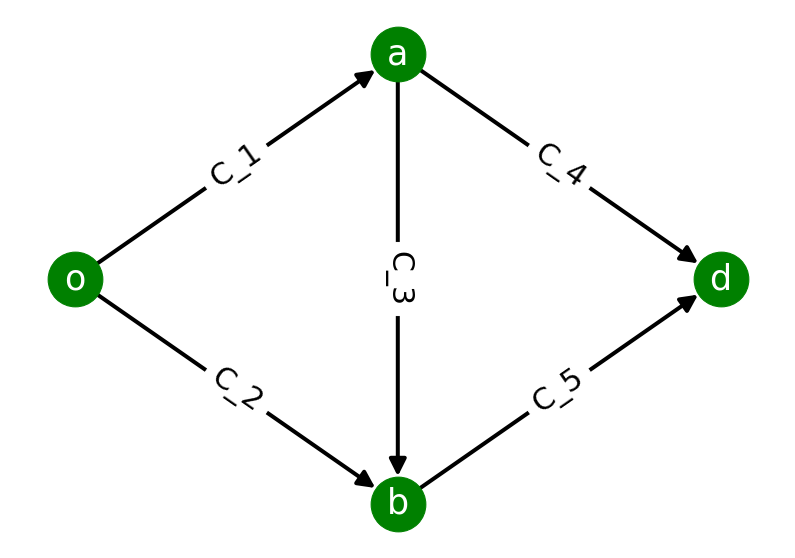

In [2]:
fig = plt.figure(1, figsize=(14,10))
G = nx.DiGraph()
G.add_node('o', pos=(0,0))
G.add_node('a', pos=(2,2))
G.add_node('b', pos=(2,-2))
G.add_node('d', pos=(4,0))
G.add_edge('o','a', capacity='C_l')
G.add_edge('o','b', capacity='C_l')
G.add_edge('a','b', capacity='C_l')
G.add_edge('a','d', capacity='C_l')
G.add_edge('b','d', capacity='C_l')
pos=nx.get_node_attributes(G,'pos')
nx.draw_networkx_edge_labels(G,pos,edge_labels={('o','a'):'C_1', 
                                                ('o','b'):'C_2',
                                                ('a','b'):'C_3',
                                                ('a','d'):'C_4',
                                                ('b','d'):'C_5'}, font_size=30)
nx.draw(G, pos, with_labels = True, font_color='white', node_color='green', 
                                    width=4, node_size=3000, font_size=35, arrowsize=35)


**(a) What is infimum of the total capacity that needs to be removed for no feasible unitary flows from o to d to exist?**

The minimum amount of capacity that need to be removed from the network such that no feasible unitary 
flows from o to d to exist coincides with the minimum-cut capacity. We want to know what is the minimum amount of capacity to remove from this network to disconnect the destination from the origin. 

To perform this operation we analize all the possible cut and the relative capacity. Then, applying the max-flow min-cut theorem we know that the maximum throughput from o to d is equal to the minimum capacity among all the cuts.

The cuts of the network are:
- CUT #1: $U=\{o\},    U^C=\{a,b,d\}$, capacity = 2C_l
- CUT #2: $U=\{o,a\},  U^C=\{b,d\}$,   capacity = 3C_l
- CUT #3: $U=\{o,b\},  U^C=\{a,d\}$,   capacity = 2C_l 
- CUT #4: $U=\{o,a,b\},U^C=\{d\}$,     capacity = 2C_l

Assuming the same capacity on each edge, the minimum total capacity to be removed for no feasible unitary flow from o to d to exits is 2C_l.

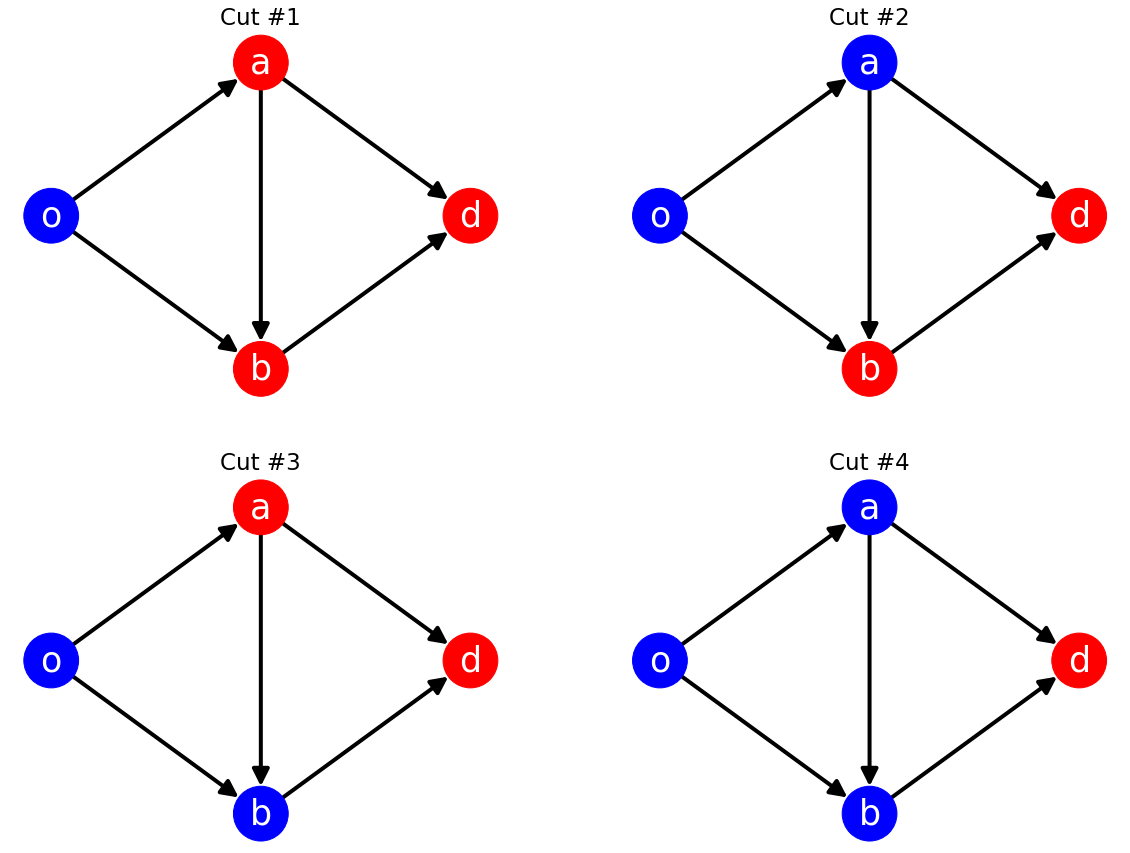

In [3]:
fig = plt.figure(1, figsize=(20,15))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_title("Cut #1", fontsize = 23)
ax2.set_title("Cut #2", fontsize = 23)
ax3.set_title("Cut #3", fontsize = 23)
ax4.set_title("Cut #4", fontsize = 23)

cuts = G

cut1 = ['blue', 'red', 'red', 'red']
cut2 = ['blue', 'blue', 'red', 'red']
cut3 = ['blue', 'red', 'blue', 'red'] 
cut4 = ['blue', 'blue', 'blue', 'red']


nx.draw(cuts, pos, with_labels = True, font_color='white', width=4, arrowsize=35, node_color=cut1, node_size=3000, font_size=35, ax=ax1)
nx.draw(cuts, pos, with_labels = True, font_color='white', width=4, arrowsize=35, node_color=cut2, node_size=3000, font_size=35, ax=ax2)
nx.draw(cuts, pos, with_labels = True, font_color='white', width=4, arrowsize=35, node_color=cut3, node_size=3000, font_size=35, ax=ax3)
nx.draw(cuts, pos, with_labels = True, font_color='white', width=4, arrowsize=35, node_color=cut4, node_size=3000, font_size=35, ax=ax4)


In [4]:
G['o']['a']['capacity'] = 1
G['a']['d']['capacity'] = 1
G['o']['b']['capacity'] = 1
G['b']['d']['capacity'] = 1
G['a']['b']['capacity'] = 1
print("maximum flow: ", nx.algorithms.flow.maximum_flow(G,'o','d'))
print("minimum cut", nx.algorithms.flow.minimum_cut(G,'o','d'))

maximum flow:  (2, {'o': {'a': 1, 'b': 1}, 'a': {'b': 0, 'd': 1}, 'b': {'d': 1}, 'd': {}})
minimum cut (2, ({'o', 'b', 'a'}, {'d'}))


**b) Assume that the link capacities are:**

**C1 = C4 = 3; C2 = C3 = C5 = 2:**

**Where should 1 unit of additional capacity be allocated in order to maximize the feasible
throughput from o to d? What is the maximal throughput?**

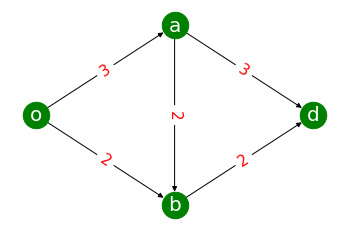

In [5]:
DG = nx.DiGraph()
DG.add_node('o', pos=(0,0))
DG.add_node('a', pos=(2,2))
DG.add_node('b', pos=(2,-2))
DG.add_node('d', pos=(4,0))
DG.add_edges_from([('o', 'a'), ('a', 'd')], capacity=3)
DG.add_edges_from([('o', 'b'), ('a', 'b'), ('b', 'd')], capacity=2)
nx.draw_networkx_edge_labels(DG,pos,edge_labels={('o','a'):DG['o']['a']['capacity'], 
                                                 ('a','d'):DG['a']['d']['capacity'],
                                                 ('o','b'):DG['o']['b']['capacity'],
                                                 ('b','d'):DG['b']['d']['capacity'],
                                                 ('a','b'):DG['a']['b']['capacity']},
                             font_size=15, font_color='red') 

pos=nx.get_node_attributes(DG,'pos')

nx.draw(DG, pos, with_labels = True, font_color='white', node_color='green', node_size=700, font_size=20)

We analyze as before the cuts in the nertwork to understand in this configuration what is the maximum throughput:
- CUT #1: $U=\{o\},    U^C=\{a,b,d\}$, capacity = 3+2 = 5
- CUT #2: $U=\{o,a\},  U^C=\{b,d\}$,   capacity = 2+2+3 = 7
- CUT #3: $U=\{o,b\},  U^C=\{a,d\}$,   capacity = 3+2 = 5 
- CUT #4: $U=\{o,a,b\},U^C=\{d\}$,     capacity = 3+2 = 5

In [6]:
def draw_capacity_labels(G=DG):
    nx.draw_networkx_edge_labels(G,pos,edge_labels={('o','a'):G['o']['a']['capacity'], 
                                                   ('a','d'):G['a']['d']['capacity'],
                                                   ('o','b'):G['o']['b']['capacity'],
                                                   ('b','d'):G['b']['d']['capacity'],
                                                   ('a','b'):G['a']['b']['capacity']},
                                                   font_size=40, font_color='red') 

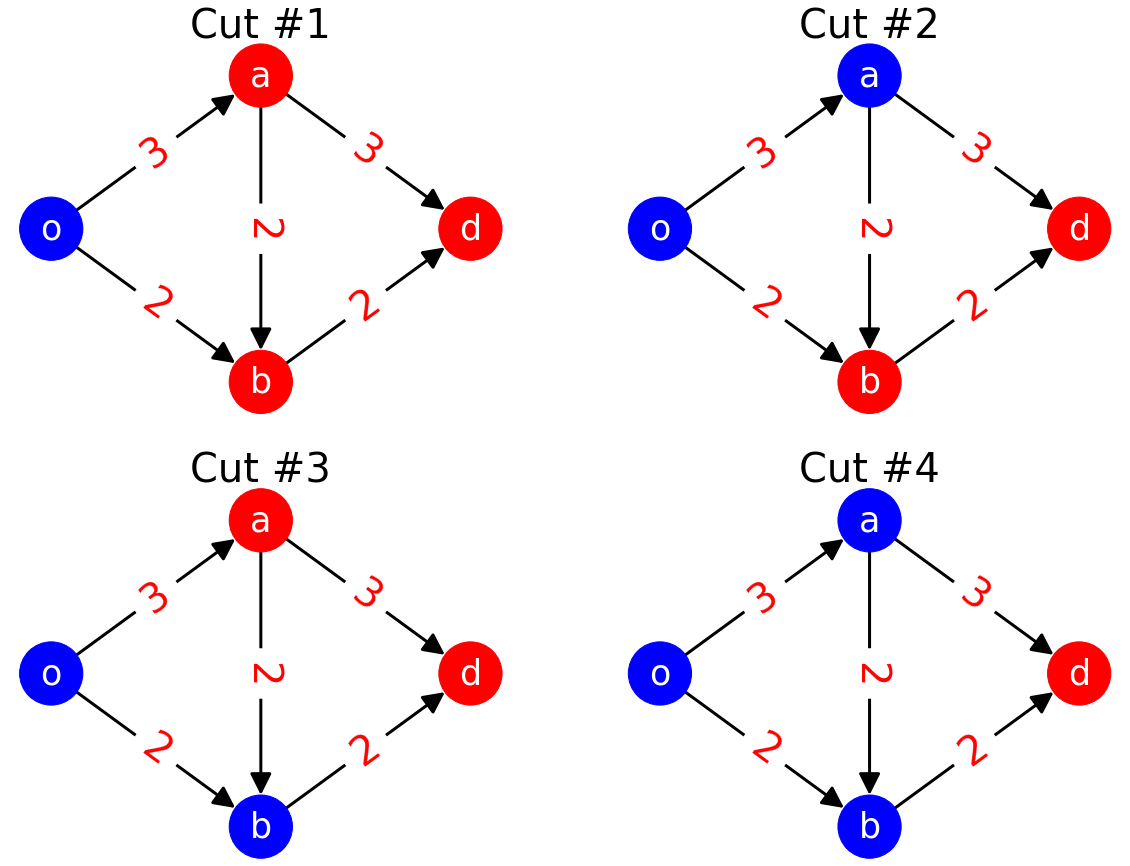

In [7]:
fig = plt.figure(1, figsize=(20,15))

ax1 = fig.add_subplot(221)
draw_capacity_labels()
ax2 = fig.add_subplot(222)
draw_capacity_labels()
ax3 = fig.add_subplot(223)
draw_capacity_labels()
ax4 = fig.add_subplot(224)
draw_capacity_labels()

ax1.set_title("Cut #1", fontsize = 40)
ax2.set_title("Cut #2", fontsize = 40)
ax3.set_title("Cut #3", fontsize = 40)
ax4.set_title("Cut #4", fontsize = 40)

cuts = DG

cut1 = ['blue', 'red', 'red', 'red']
cut2 = ['blue', 'blue', 'red', 'red']
cut3 = ['blue', 'red', 'blue', 'red'] 
cut4 = ['blue', 'blue', 'blue', 'red']
nx.draw(cuts, pos, with_labels = True, font_color='white', width=3, arrowsize=45, node_color=cut1, node_size=4000, font_size=35, ax=ax1)
nx.draw(cuts, pos, with_labels = True, font_color='white', width=3, arrowsize=45, node_color=cut2, node_size=4000, font_size=35, ax=ax2)
nx.draw(cuts, pos, with_labels = True, font_color='white', width=3, arrowsize=45, node_color=cut3, node_size=4000, font_size=35, ax=ax3)
nx.draw(cuts, pos, with_labels = True, font_color='white', width=3 , arrowsize=45, node_color=cut4, node_size=4000, font_size=35, ax=ax4)


In [8]:
print("maximum flow: ", nx.algorithms.flow.maximum_flow(DG,'o','d'))
print("minimum cut", nx.algorithms.flow.minimum_cut(DG,'o','d'))

maximum flow:  (5, {'o': {'a': 3, 'b': 2}, 'a': {'d': 3, 'b': 0}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b', 'a'}, {'d'}))


Now we need to decide where add 1 unit of capacity to maximize the feasible flow. 

If we add some capacity the role of the min-cut can played by a different cut. It is preferable to add 1 unit of capacity to the most shared link between the cuts with lowest capacity. In this case there is not a unique link shared among the CUT #1, CUT #3 and CUT #4.

The addition of a single unit of capacity will not change the maximum throughput because adding 1 unit of capacity in any link does not modify the minimum capacity which remains 5.

However not all the additions are equals. 

In fact, if we add 1 unit to link e1 (o-a) we increase the capacity on both CUT #1 and CUT #3 (but not on CUT #4 with capacity = 5). 

In the same way, adding 1 unit to link e5 (b-d) we increase to 6 the capacity of CUT #4 and CUT #3, but CUT #1 remains with capacity=5.

**(c) Consider link capacities at initial point b. Where should 2 units of additional capacity be allocated in order to maximize the feasible throughput from o to d? Compute all the optimal capacity allocations for this case and the optimal throughput.**

I need to define some useful function in order to allocate the additional units and compute which are the optimal flow allocations.

In [9]:
# I pass a graph, the origin and the destination to compute the edges, the maximum flow and the minimum cut.
# I want to print the edges since I need to check if the units are effectively allocated on the graph.
def print_dict_max_flow_min_cut(graph, orig, dest):
        print("network edges: ", dict(graph.edges))
        print("maximum flow: ", nx.algorithms.flow.maximum_flow(graph, orig, dest))
        print("minimum cut", nx.algorithms.flow.minimum_cut(graph, orig, dest))
        print("")

# Function to extract the head and tail values
def head_tail(pair):
    head, tail = pair
    return head, tail

# Here I define a function with the following parameters:
# 1. tmp_graph: the graph to which I want to add the units
# 2. tuples: tuples contains the array with the length of the tuples containing the edges
# 3. unit: the additional unit to add to a given edge
# 4. allocation_set: the list which contains the possible allocations of units
# 5. e: the edge that I am considering in that moment
def add_capacity(tmp_graph, tuples, unit, allocation_set, e, idx): 
    print(f"{idx+1})")
    # I iterate over the elements in the allocation_set
    for i, t in enumerate(tuples):      
        
        # first case: I want to add all the capacity over a single link:
        # link1:  o->a +2
        if np.shape(allocation_set)[0]==1 and np.shape(allocation_set)[1]==1:
            #print("first case")
            print(f"link{i+1}: ", e[0] + "->" + e[1] + " +" + str(unit[i]))
            tmp_graph[e[0]][e[1]]['capacity'] += unit[i]
            break
        
        # second case: I have multiple links and I have also multiple possible allocations
        if np.shape(allocation_set)[0]>1 and np.shape(allocation_set)[1]>1:
            #print("second case")
            head, tail = head_tail(e[i])
            print(f"link{i+1}: ", head + "->" + tail + " +" + str(unit[i]))
            tmp_graph[head][tail]['capacity'] += unit[i] 
            
        # third case: I have multiple links but a single possible allocation
        # link1:  o->b +1
        # link2:  a->b +1
        if np.shape(allocation_set)[0]==1 and np.shape(allocation_set)[1]>1:
            #print("third case")
            print(f"link{i+1}: ", e[i][0] + "->" + e[i][1] + " +" + str(unit[i]))
            tmp_graph[e[i][0]][e[i][1]]['capacity'] += unit[i]

    print_dict_max_flow_min_cut(tmp_graph, 'o','d') 

def add_capacity_compute_max_throughput(list_edges, one_edge=None, two_edge=None, three_edge=None, four_edge=None):
    for idx, edge in enumerate(list_edges):

        # compute the lenght of the tuple
        tuples = [len(a) for a in edge]

        # One edge
        if np.size(edge)==2:
            for comb in one_edge:
                tmp_graph = DG.copy()
                add_capacity(tmp_graph, tuples, comb, one_edge, edge, idx)

        # Two edges
        if np.size(edge)==4: 
            for comb in two_edge:
                tmp_graph = DG.copy()
                add_capacity(tmp_graph, tuples, comb, two_edge, edge, idx)

        # Three edges
        if np.size(edge)==6: 
            for comb in three_edge:
                tmp_graph = DG.copy()     
                add_capacity(tmp_graph, tuples, comb, three_edge, edge, idx)

        # Four edges
        if np.size(edge)==8: 
            #print(edge)
            for comb in four_edge:
                tmp_graph = DG.copy()
                add_capacity(tmp_graph, tuples, comb, four_edge, edge, idx)

In [10]:
# Since I can allocate at most 2 units of flow, these are the possible allocations
one_edge = [[2]]
two_edge = [[1,1]]

# I compute all the possible combinations of edges over which allocate the 2 additional units
list_edges = list(dict(DG.copy().edges()).keys())
list_edges.extend(list(itertools.combinations(list_edges,2)))

add_capacity_compute_max_throughput(list_edges, one_edge, two_edge)

1)
link1:  o->a +2
network edges:  {('o', 'a'): {'capacity': 5}, ('o', 'b'): {'capacity': 2}, ('a', 'd'): {'capacity': 3}, ('a', 'b'): {'capacity': 2}, ('b', 'd'): {'capacity': 2}}
maximum flow:  (5, {'o': {'a': 5, 'b': 0}, 'a': {'d': 3, 'b': 2}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b', 'a'}, {'d'}))

2)
link1:  o->b +2
network edges:  {('o', 'a'): {'capacity': 3}, ('o', 'b'): {'capacity': 4}, ('a', 'd'): {'capacity': 3}, ('a', 'b'): {'capacity': 2}, ('b', 'd'): {'capacity': 2}}
maximum flow:  (5, {'o': {'a': 3, 'b': 2}, 'a': {'d': 3, 'b': 0}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b', 'a'}, {'d'}))

3)
link1:  a->d +2
network edges:  {('o', 'a'): {'capacity': 3}, ('o', 'b'): {'capacity': 2}, ('a', 'd'): {'capacity': 5}, ('a', 'b'): {'capacity': 2}, ('b', 'd'): {'capacity': 2}}
maximum flow:  (5, {'o': {'a': 3, 'b': 2}, 'a': {'d': 3, 'b': 0}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b'}, {'d', 'a'}))

4)
link1:  a->b +2
network edges:  {('o', 'a'): {'capac

The optimal allocations are the following:

- 1) link1: o->a +1, link2: a->d +1 
- 2) link1: o->a +1, link2: b->d +1 
- 3) link1: o->b +1, link2: b->d +1 

In all the three cases we reach a maximum throughput equal to 6, so improving of 1 the previous maximum throughput of 5.

**(d) Where should 4 units of additional capacity be allocated in order to maximize the feasible throughput from o to d? Compute all the optimal capacity allocations for this case. Among the optimal allocations, select the allocation that maximizes the sum of the cut capacities.**

In [11]:
list_edges = list(dict(DG.copy().edges()).keys())
list_edges_init = list_edges.copy()
list_edges.extend(list(itertools.combinations(list_edges_init,2)))
list_edges.extend(list(itertools.combinations(list_edges_init,3)))
list_edges.extend(list(itertools.combinations(list_edges_init,4)))

In [12]:
one_edge = [[4]]
two_edge = [[2,2],[1,3],[3,1]]
three_edge = [[1,1,2],[1,2,1],[2,1,1]]
four_edge = [[1, 1, 1, 1]]

add_capacity_compute_max_throughput(list_edges, one_edge, two_edge, three_edge, four_edge)

1)
link1:  o->a +4
network edges:  {('o', 'a'): {'capacity': 7}, ('o', 'b'): {'capacity': 2}, ('a', 'd'): {'capacity': 3}, ('a', 'b'): {'capacity': 2}, ('b', 'd'): {'capacity': 2}}
maximum flow:  (5, {'o': {'a': 5, 'b': 0}, 'a': {'d': 3, 'b': 2}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b', 'a'}, {'d'}))

2)
link1:  o->b +4
network edges:  {('o', 'a'): {'capacity': 3}, ('o', 'b'): {'capacity': 6}, ('a', 'd'): {'capacity': 3}, ('a', 'b'): {'capacity': 2}, ('b', 'd'): {'capacity': 2}}
maximum flow:  (5, {'o': {'a': 3, 'b': 2}, 'a': {'d': 3, 'b': 0}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b', 'a'}, {'d'}))

3)
link1:  a->d +4
network edges:  {('o', 'a'): {'capacity': 3}, ('o', 'b'): {'capacity': 2}, ('a', 'd'): {'capacity': 7}, ('a', 'b'): {'capacity': 2}, ('b', 'd'): {'capacity': 2}}
maximum flow:  (5, {'o': {'a': 3, 'b': 2}, 'a': {'d': 3, 'b': 0}, 'b': {'d': 2}, 'd': {}})
minimum cut (5, ({'o', 'b'}, {'d', 'a'}))

4)
link1:  a->b +4
network edges:  {('o', 'a'): {'capac

The optimal assignment of 4 units of flows are:

- 1) o->a +2, a->d +2, (case 7) 
- 2) o->a +2, b->d +2, (case 9) 
- 3) o->b +2, b->d +2 (case 12)           
- 4) o->a +1, o->b +1, b->d +2 (case 18)
- 5) o->a +2, a->d +1, b->d +1 (case 20)
- 6) o->a +1, o->b +1, a->d +1, b->d +1 (case 27)  

In all these cases the maximum throughput is 7.

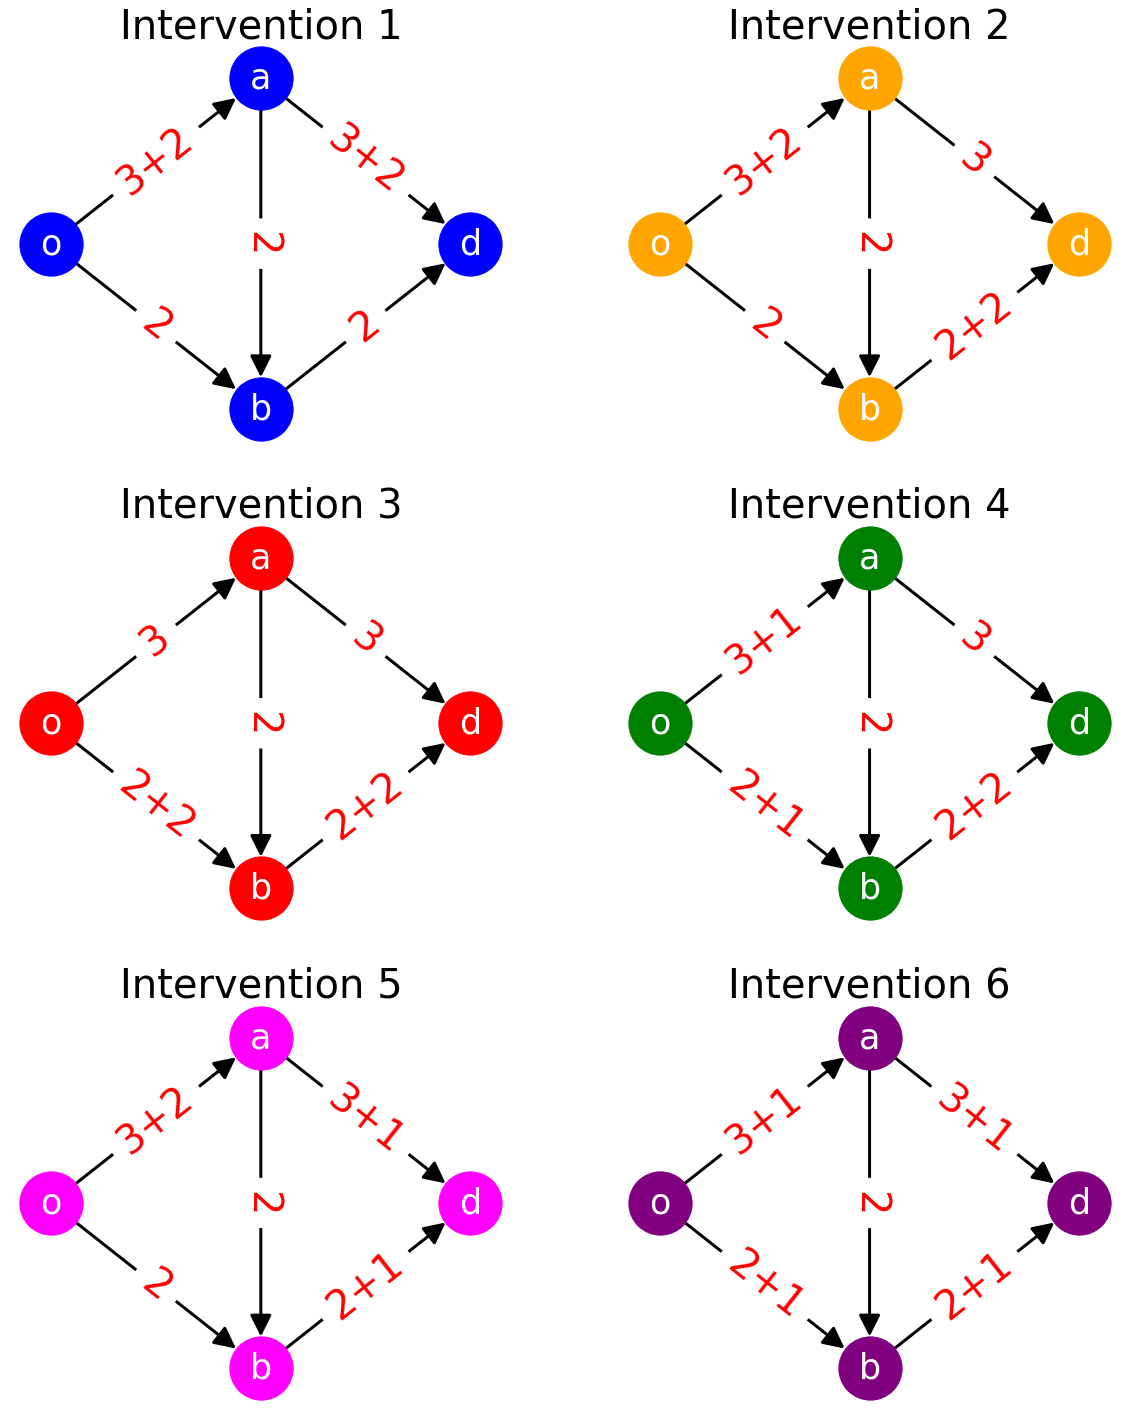

In [23]:
fig = plt.figure(1, figsize=(20,25))


graph1 = DG.copy()
graph1['o']['a']['capacity'] = '3+2'
graph1['a']['d']['capacity'] = '3+2'

graph2 = DG.copy()
graph2['o']['a']['capacity'] = '3+2'
graph2['b']['d']['capacity'] = '2+2'

graph3 = DG.copy()
graph3['o']['b']['capacity'] = '2+2'
graph3['b']['d']['capacity'] = '2+2'

graph4 = DG.copy()
graph4['o']['a']['capacity'] = '3+1'
graph4['o']['b']['capacity'] = '2+1'
graph4['b']['d']['capacity'] = '2+2'

graph5 = DG.copy()
graph5['o']['a']['capacity'] = '3+2'
graph5['a']['d']['capacity'] = '3+1'
graph5['b']['d']['capacity'] = '2+1'

graph6 = DG.copy()
graph6['o']['a']['capacity'] = '3+1'
graph6['o']['b']['capacity'] = '2+1'
graph6['a']['d']['capacity'] = '3+1'
graph6['b']['d']['capacity'] = '2+1'

ax1 = fig.add_subplot(321)
draw_capacity_labels(graph1)
ax2 = fig.add_subplot(322)
draw_capacity_labels(graph2)
ax3 = fig.add_subplot(323)
draw_capacity_labels(graph3)
ax4 = fig.add_subplot(324)
draw_capacity_labels(graph4)
ax5 = fig.add_subplot(325)
draw_capacity_labels(graph5)
ax6 = fig.add_subplot(326)
draw_capacity_labels(graph6)

ax1.set_title("Intervention 1", fontsize = 40)
ax2.set_title("Intervention 2", fontsize = 40)
ax3.set_title("Intervention 3", fontsize = 40)
ax4.set_title("Intervention 4", fontsize = 40)
ax5.set_title("Intervention 5", fontsize = 40)
ax6.set_title("Intervention 6", fontsize = 40)


nx.draw(graph1, pos, with_labels = True, font_color='white', width=3, arrowsize=45, node_color='blue',   node_size=4000, font_size=35, ax=ax1)
nx.draw(graph2, pos, with_labels = True, font_color='white', width=3, arrowsize=45, node_color='orange', node_size=4000, font_size=35, ax=ax2)
nx.draw(graph3, pos, with_labels = True, font_color='white', width=3, arrowsize=45, node_color='red',    node_size=4000, font_size=35, ax=ax3)
nx.draw(graph4, pos, with_labels = True, font_color='white', width=3, arrowsize=45, node_color='green',  node_size=4000, font_size=35, ax=ax4)
nx.draw(graph5, pos, with_labels = True, font_color='white', width=3, arrowsize=45, node_color='magenta',node_size=4000, font_size=35, ax=ax5)
nx.draw(graph6, pos, with_labels = True, font_color='white', width=3, arrowsize=45, node_color='purple', node_size=4000, font_size=35, ax=ax6)


All the sum of the cuts in the graphs is equal to 30.